In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [40]:
df=pd.read_csv('../artifacts/data.csv')
print(df.columns.tolist())

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [41]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [42]:
df1=df.copy()
df1.drop(['id','Unnamed: 32'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [43]:
# target column B:enign and M:malignant
df1['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [44]:
print(df1.dtypes)

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [45]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [46]:
# normalize the data
col={
    'radius_mean','texture_mean','perimeter_mean','area_mean',
    'radius_se','texture_se','perimeter_se','area_se',
    'radius_worst','texture_worst',
    'perimeter_worst','area_worst'
}

for i in col:
    df1[i]=(df1[i]-df1[i].min())/(df1[i].max()-df1[i].min())
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.620776,0.141525,0.668310,0.450698,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.606901,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.556386,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.248310,0.385928,0.241347,0.094008,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.519744,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
# Split data into input feature and output features
X=df1.drop(columns=['diagnosis'],axis=1)

# convert categorical data to numerical data
df1['diagnosis'].replace({'B':0,'M':1},inplace=True)
y=df1['diagnosis']


C:\Users\aryam\AppData\Local\Temp\ipykernel_15096\2142422365.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['diagnosis'].replace({'B':0,'M':1},inplace=True)
C:\Users\aryam\AppData\Local\Temp\ipykernel_15096\2142422365.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['diagnosis'].repl

In [48]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.620776,0.141525,0.668310,0.450698,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.606901,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.556386,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.248310,0.385928,0.241347,0.094008,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.519744,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [50]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [51]:
# Logestic Regresion
from sklearn.linear_model import LogisticRegression
model_parms = {
    'C': 3.0,                     # Slightly less regularization to fit minority class better
    'class_weight': 'balanced',    # Handle imbalanced dataset
    'penalty': 'l2',               # l2 regularization for stability
    'solver': 'lbfgs',             # Efficient solver for small-medium datasets
    'max_iter': 1000,              # Allow enough iterations for convergence
    'fit_intercept': True,         # Include bias/intercept term
    'random_state': 42,            # Reproducibility
    'tol': 1e-4,                   # Convergence tolerance
}

model_lr=LogisticRegression(
    **model_parms
    )
model_lr.fit(X_train,y_train)

LogisticRegression(C=3.0, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [52]:
# Make predictions
y_pred = model_lr.predict(X_test)

# Get prediction probabilities (for ROC/AUC)
y_proba = model_lr.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
 [[72  0]
 [ 2 40]]
ROC AUC: 0.9976851851851852


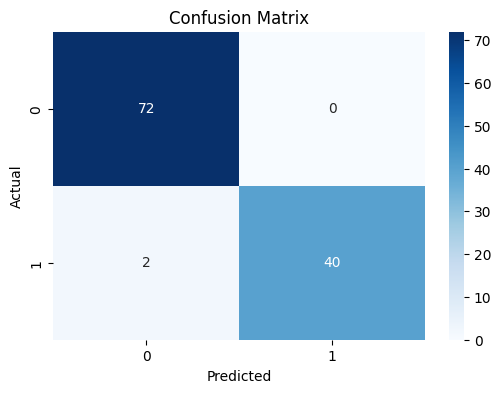

In [ ]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
# Save plot as artifact
plt.savefig("../artifacts/Images/confusion_matrix1.png")
plt.show()
plt.close()

In [54]:
report_lr=classification_report(y_test, y_pred, output_dict=True)
print(report_lr)

{'0': {'precision': 0.972972972972973, 'recall': 1.0, 'f1-score': 0.9863013698630136, 'support': 72.0}, '1': {'precision': 1.0, 'recall': 0.9523809523809523, 'f1-score': 0.975609756097561, 'support': 42.0}, 'accuracy': 0.9824561403508771, 'macro avg': {'precision': 0.9864864864864865, 'recall': 0.9761904761904762, 'f1-score': 0.9809555629802873, 'support': 114.0}, 'weighted avg': {'precision': 0.9829302987197724, 'recall': 0.9824561403508771, 'f1-score': 0.9823623542652152, 'support': 114.0}}


In [55]:
from xgboost import XGBClassifier
# model params
params={
    'max_depth': 8,
    'learning_rate': 0.001,
    'n_estimators': 100,
    'subsample': 0.8,
    'reg_lambda': 1.0,
    'reg_alpha': 0.0,
    'feature_selector':'shuffle',
    'eval_metric':'logloss',
    'random_state':42,
    'use_label_encoder':False,

}
# Train XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [56]:
# Make predictions
y_pred = model_xgb.predict(X_test)

# Get prediction probabilities (useful for ROC/AUC)
y_proba = model_xgb.predict_proba(X_test)[:, 1]

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[72  0]
 [ 3 39]]
ROC AUC: 0.9940476190476191


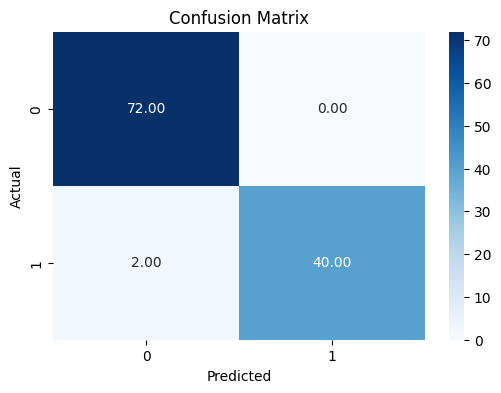

In [ ]:
# Confusion Matrix Visualization

cm2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Save plot as artifact
plt.savefig("../artifacts/Images/confusion_matrix2.png")
plt.show()
plt.close()

In [58]:
report_xgb=classification_report(y_test, y_pred, output_dict=True)
print(report_xgb)

{'0': {'precision': 0.96, 'recall': 1.0, 'f1-score': 0.9795918367346939, 'support': 72.0}, '1': {'precision': 1.0, 'recall': 0.9285714285714286, 'f1-score': 0.9629629629629629, 'support': 42.0}, 'accuracy': 0.9736842105263158, 'macro avg': {'precision': 0.98, 'recall': 0.9642857142857143, 'f1-score': 0.9712773998488284, 'support': 114.0}, 'weighted avg': {'precision': 0.9747368421052632, 'recall': 0.9736842105263158, 'f1-score': 0.9734654095556351, 'support': 114.0}}


In [59]:
print(report_lr)

{'0': {'precision': 0.972972972972973, 'recall': 1.0, 'f1-score': 0.9863013698630136, 'support': 72.0}, '1': {'precision': 1.0, 'recall': 0.9523809523809523, 'f1-score': 0.975609756097561, 'support': 42.0}, 'accuracy': 0.9824561403508771, 'macro avg': {'precision': 0.9864864864864865, 'recall': 0.9761904761904762, 'f1-score': 0.9809555629802873, 'support': 114.0}, 'weighted avg': {'precision': 0.9829302987197724, 'recall': 0.9824561403508771, 'f1-score': 0.9823623542652152, 'support': 114.0}}


In [60]:
report_lr['accuracy']
# report_lr['0']['precision']
# report_lr['0']['recall']
# report_lr['0']['f1-score']

# report_lr['1']
# report_lr['1']['precision']
# report_lr['1']['recall']
# report_lr['1']['f1-score']

# report_lr['accuracy']
# report_lr['macro avg']
# report_lr['weighted avg']


0.9824561403508771

In [ ]:
import mlflow

# mlflow.create_experiment("Breast_Cancer_Prediction001")
mlflow.set_experiment("Breast_Cancer_Prediction001")
mlflow.set_tracking_uri("http://localhost:5000")
# Create a Dataset object
dataset = mlflow.data.from_pandas(
    df1,  name="Breast_Cancer", targets="diagnosis"
)
input_example = X_train.iloc[:5] # Example input for model signature

# Logistic Regression Run
with mlflow.start_run(run_name='LogisticRegression'):
    mlflow.log_input(dataset)
    # log parameters 
    mlflow.log_params(model_parms)
    # log metrics
    mlflow.log_metrics({
        'accuracy_score': report_lr['accuracy'],
        'precision_0': report_lr['0']['precision'],
        'recall_0': report_lr['0']['recall'],
        'f1-score_0': report_lr['0']['f1-score'],
        'precision_1': report_lr['1']['precision'],
        'recall_1': report_lr['1']['recall'],
        'f1-score_1': report_lr['1']['f1-score'],
        'macro avg_precision': report_lr['macro avg']['precision'],
        'macro avg_recall': report_lr['macro avg']['recall'],
        'macro avg_f1-score': report_lr['macro avg']['f1-score'],
        'weighted avg_precision': report_lr['weighted avg']['precision'],
        'weighted avg_recall': report_lr['weighted avg']['recall'],
        'weighted avg_f1-score': report_lr['weighted avg']['f1-score'],
    })
    mlflow.sklearn.log_model(sk_model=model_lr, name="log_reg_model",input_example=input_example, registered_model_name="log_reg_model")
    mlflow.log_artifact("../artifacts/Images/confusion_matrix1.png")
    

# XGBoost Run
with mlflow.start_run(run_name='XGBoost'):
    mlflow.log_input(dataset)
    # log parameters 
    mlflow.log_params(params)

    # log metrics
    mlflow.log_metrics({
        'accuracy_score': report_xgb['accuracy'],
        'precision_0': report_xgb['0']['precision'],
        'recall_0': report_xgb['0']['recall'],
        'f1-score_0': report_xgb['0']['f1-score'],
        'precision_1': report_xgb['1']['precision'],
        'recall_1': report_xgb['1']['recall'],
        'f1-score_1': report_xgb['1']['f1-score'],
        'macro avg_precision': report_xgb['macro avg']['precision'],
        'macro avg_recall': report_xgb['macro avg']['recall'],
        'macro avg_f1-score': report_xgb['macro avg']['f1-score'],
        'weighted avg_precision': report_xgb['weighted avg']['precision'],
        'weighted avg_recall': report_xgb['weighted avg']['recall'],
        'weighted avg_f1-score': report_xgb['weighted avg']['f1-score'],
    })
    mlflow.xgboost.log_model(model_xgb, name="xgboost_model",input_example=input_example, registered_model_name="xgboost_model")
    mlflow.log_artifact("../artifacts/Images/confusion_matrix2.png")


C:\Users\aryam\AppData\Roaming\Python\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
C:\Users\aryam\AppData\Roaming\Python\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input d

Registered model 'log_reg_model' already exists. Creating a new version of this model...
2025/09/17 12:49:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: log_reg_model, version 5
Created version '5' of model 'log_reg_model'.


🏃 View run LogisticRegression at: http://localhost:5000/#/experiments/337715053130804821/runs/fcc4a82223904988bea25f4e39840087
🧪 View experiment at: http://localhost:5000/#/experiments/337715053130804821


C:\Users\aryam\AppData\Roaming\Python\Python313\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
C:\Users\aryam\AppData\Roaming\Python\Python313\site-packages\xgboost\sklearn.py:1028: UserWarning: [12:49:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as defa

Registered model 'xgboost_model' already exists. Creating a new version of this model...
2025/09/17 12:50:04 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: xgboost_model, version 3
Created version '3' of model 'xgboost_model'.


🏃 View run XGBoost at: http://localhost:5000/#/experiments/337715053130804821/runs/40d3677ee22d4b43b6470a9a4a03f262
🧪 View experiment at: http://localhost:5000/#/experiments/337715053130804821


In [62]:
# For deploying the model using MLflow's built-in model serving capabilities:
# mlflow models serve -m runs:/<run_id>/model